In [116]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data= pd.read_csv('C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/Black Friday/BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Let's find out what type of features we have in our dataset.

In [16]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [18]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [21]:
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [22]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [25]:
data['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [26]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [29]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Useful information that can be extracted from this data: 

* Who is more likely to spend more on Black Friday i.e Man/Woman, Married/Unmarried, What age group

* What type of products people purchase more i.e Category 1, 2 or 3

* Who spent more i.e Old/New customer

* From which area people spend more 

* From what type of occupation people spend more 


Let's find out if there exist any missing value in our data.

In [11]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing= pd.concat([total, percent], axis=1, join='outer',keys=['Total missing count', 'Percentage '])
missing

,Total missing count,Percentage
Product_Category_3,373299,0.694410
Product_Category_2,166986,0.310627
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


As we can see, about 69% information is missing in Product_Category_3 and 31% in Product_Category_2.

Let's assign 0 to nan values.

In [107]:
data.dropna(0, inplace=True)

In [31]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Let's visualize each feature one by one.

##### Let's view who is more likely to spend more on Black Friday i.e Man/Woman

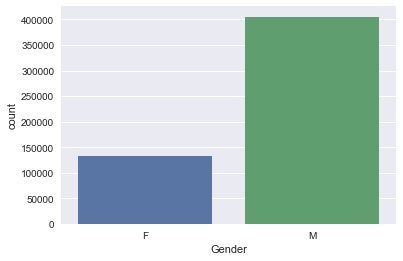

In [33]:
sns.countplot(data['Gender'])

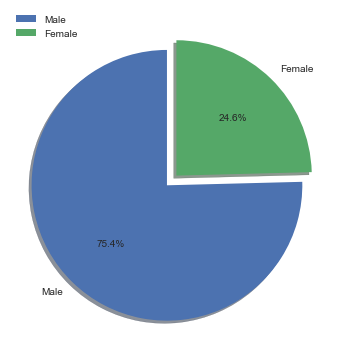

In [83]:
plt.figure(figsize=[5,5])
plt.pie(data['Gender'].value_counts(),labels=['Male','Female'],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.tight_layout()
plt.legend()
plt.show()

###### Let's view which age group people are more likely to spend more on Black Friday

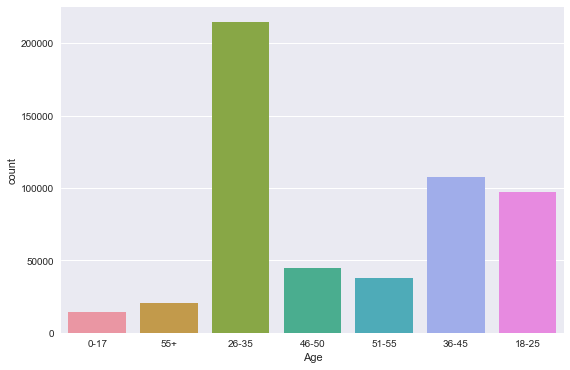

In [75]:
plt.figure(figsize=[9,6])
sns.countplot(data['Age'])

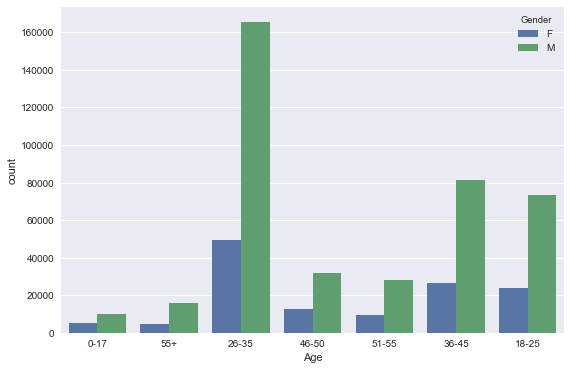

In [74]:
plt.figure(figsize=[9,6])
sns.countplot(data['Age'], hue=data['Gender'])

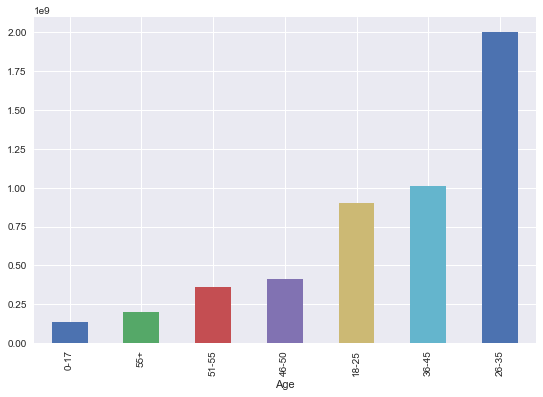

In [89]:
plt.figure(figsize=[9,6])
data.groupby('Age')['Purchase'].sum().sort_values().plot('bar')

##### Let's find out Marital status of people who spend more on Black Friday

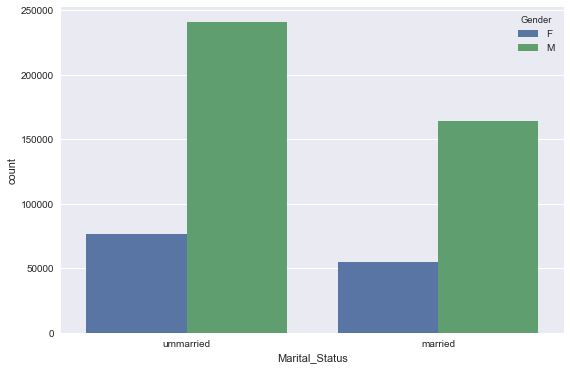

In [78]:
data['Marital_Status']=data['Marital_Status'].replace(1, 'married')
data['Marital_Status']=data['Marital_Status'].replace(0, 'ummarried')
plt.figure(figsize=[9,6])
sns.countplot(data['Marital_Status'], hue=data['Gender'])

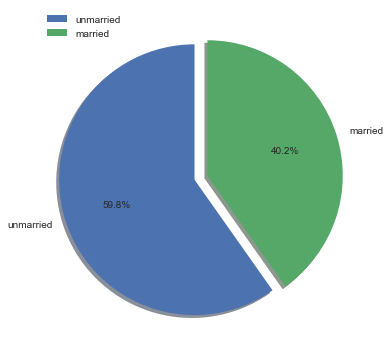

In [115]:
plt.figure(figsize=[5,5])
plt.pie(data['Marital_Status'].value_counts(),labels=['unmarried','married', ],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.tight_layout()
plt.legend()
plt.show()

##### Let's view area of people

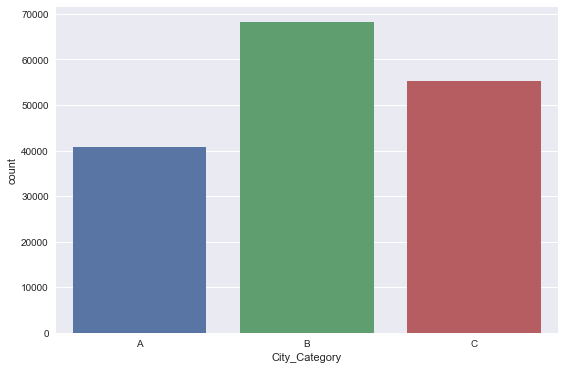

In [118]:
plt.figure(figsize=[9,6])
sns.countplot(data['City_Category'])

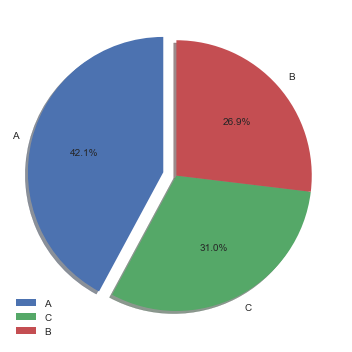

In [82]:
plt.figure(figsize=[5,5])
plt.pie(data['City_Category'].value_counts(),labels=data['City_Category'].unique(),
        explode=(0.1,0,0),
        shadow=True,
        startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.legend()
plt.show()

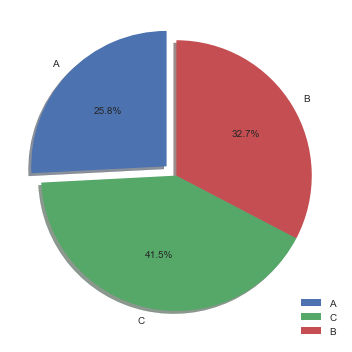

In [86]:
plt.figure(figsize=[5,5])
plt.pie(data.groupby('City_Category')['Purchase'].sum(),labels=data['City_Category'].unique(),
        explode=(0.1,0,0),
        shadow=True,
        startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.legend()
plt.show()

##### Let's visualize old and new customer's ratio

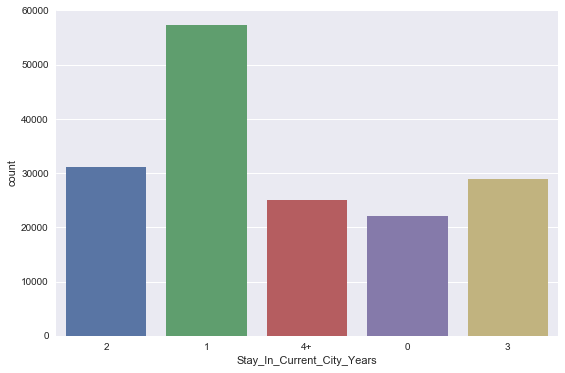

In [119]:
plt.figure(figsize=[9,6])
sns.countplot(data['Stay_In_Current_City_Years'])

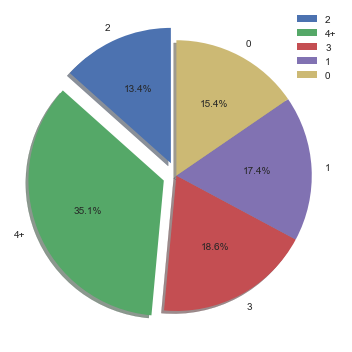

In [96]:
plt.figure(figsize=[5,5])
plt.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),labels=data['Stay_In_Current_City_Years'].unique(),
        explode=(0.1,0.1,0,0,0),
        shadow=True,
        startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.legend()
plt.show()

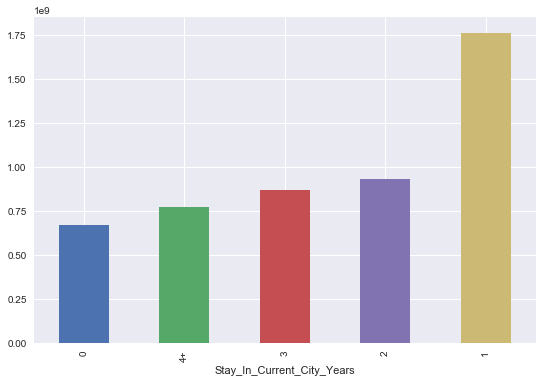

In [98]:
plt.figure(figsize=[9,6])

data.groupby('Stay_In_Current_City_Years')['Purchase'].sum().sort_values().plot('bar')

##### Let's visualize occupation of people who spend more on Black Friday

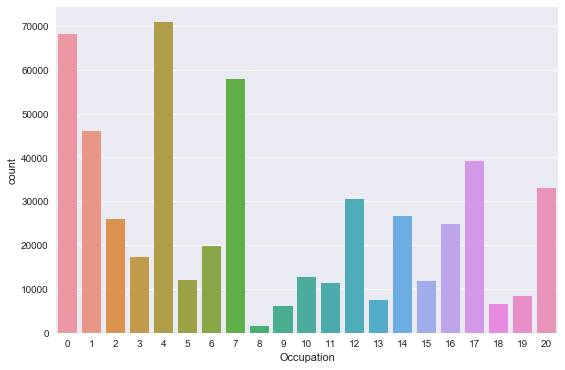

In [99]:
plt.figure(figsize=[9,6])
sns.countplot(data['Occupation'])

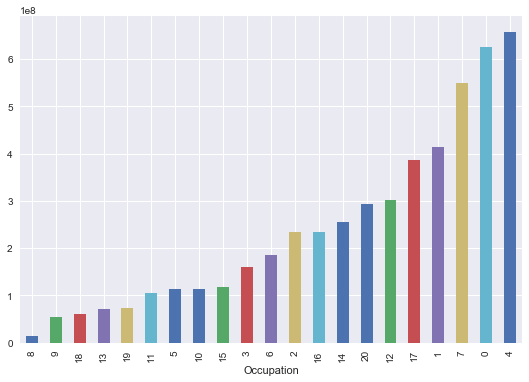

In [102]:
plt.figure(figsize=[9,6])

data.groupby('Occupation')['Purchase'].sum().sort_values().plot('bar')

##### Let's visulaize product categories people purcahse more on Black Friday

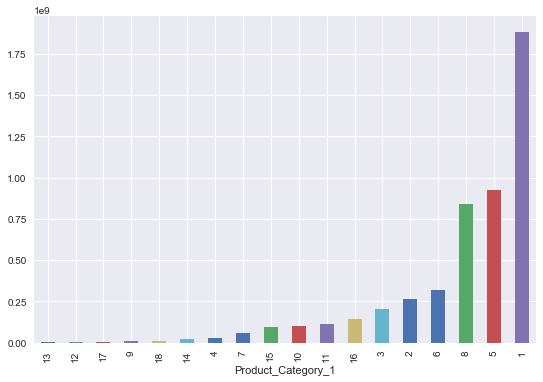

In [103]:
plt.figure(figsize=[9,6])

data.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot('bar')

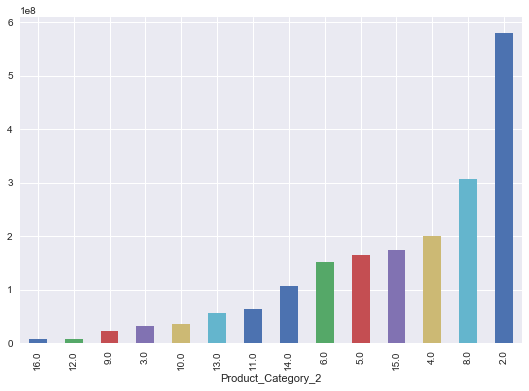

In [109]:
plt.figure(figsize=[9,6])

data.groupby('Product_Category_2')['Purchase'].sum().sort_values().plot('bar')

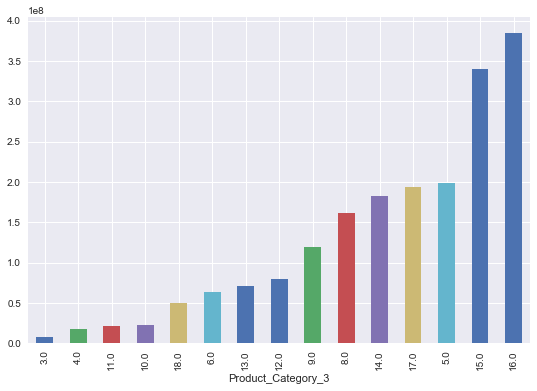

In [108]:
plt.figure(figsize=[9,6])

data.groupby('Product_Category_3')['Purchase'].sum().sort_values().plot('bar')

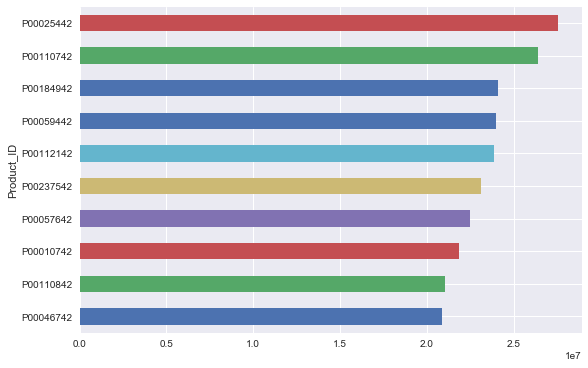

In [112]:
plt.figure(figsize=[9,6])

data.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot('barh')